## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tabulate import tabulate


## Load Dataset

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv("02-14-2018.csv")

## Explore the Dataset

In [3]:
%%time
#print first 5 row of the dataset
df.head()

Wall time: 0 ns


Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts   
0         0         0  14/02/2018 08:31:01      112641719             3  \
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max   
0             0                0                0                0  \
1             0                0                0                0   
2             0                0                0                0   
3            10             1239             2273              744   
4            11             1143             2209              744   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std   
0                0  ...                 0          0.0         0.0  \
1                0  ...                 0          0.0         0.0   
2                0  ...                 0          0.0         0.0   
3                0  ...                32          0.0         0.0   
4                0  ...                32          0.0         0.0   

   Active Max  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min   Label  
0           0           0  56320859.5  139.300036  56320958  56320761  Benign  
1           0           0  56320733.0  114.551299  56320814  56320652  Benign  
2           0           0  56319311.5  301.934596  56319525  56319098  Benign  
3           0           0         0.0    0.000000         0         0  Benign  
4           0           0         0.0    0.000000         0         0  Benign  

[5 rows x 80 columns]

In [4]:
# Get the shape of the DataFrame
df_shape = df.shape

# Print the number of rows
num_rows = df_shape[0]
print("Number of rows:", num_rows)

# Print the number of columns
num_columns = df_shape[1]
print("Number of columns:", num_columns)

Number of rows: 1048575
Number of columns: 80


In [5]:
# Get information about the DataFrame
df_info = df.info()

# Print the information about the DataFrame
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [6]:
# Count the occurrences of each unique value in the 'Label' column
label_counts = df['Label'].value_counts()

# Print the value counts
print(label_counts)

Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64


In [7]:
# Generate and print the descriptive statistics of the DataFrame
df.describe()

Dst Port      Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts   
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06  \
mean   4.876262e+03  8.107557e+00   6.255555e+06  6.206622e+00  7.211191e+00   
std    1.444344e+04  4.460625e+00   1.260291e+09  4.447851e+01  1.048682e+02   
min    0.000000e+00  0.000000e+00  -9.190110e+11  1.000000e+00  0.000000e+00   
25%    2.200000e+01  6.000000e+00   7.000000e+00  1.000000e+00  1.000000e+00   
50%    5.300000e+01  6.000000e+00   1.023000e+03  2.000000e+00  1.000000e+00   
75%    4.430000e+02  6.000000e+00   4.066690e+05  7.000000e+00  6.000000e+00   
max    6.553300e+04  1.700000e+01   1.200000e+08  5.115000e+03  9.198000e+03   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min   
count     1.048575e+06     1.048575e+06     1.048575e+06     1.048575e+06  \
mean      4.479936e+02     4.521803e+03     1.745736e+02     8.389535e+00   
std       1.573541e+04     1.515021e+05     2.876713e+02     1.948279e+01   
min       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
25%       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
50%       3.600000e+01     5.500000e+01     3.400000e+01     0.000000e+00   
75%       4.550000e+02     7.680000e+02     1.990000e+02     0.000000e+00   
max       8.591554e+06     1.339773e+07     6.444000e+04     1.460000e+03   

       Fwd Pkt Len Mean  ...  Fwd Act Data Pkts  Fwd Seg Size Min   
count      1.048575e+06  ...       1.048575e+06      1.048575e+06  \
mean       3.879579e+01  ...       2.793536e+00      2.327970e+01   
std        5.331882e+01  ...       5.557106e+00      1.106185e+01   
min        0.000000e+00  ...       0.000000e+00      0.000000e+00   
25%        0.000000e+00  ...       0.000000e+00      2.000000e+01   
50%        2.566667e+01  ...       0.000000e+00      2.000000e+01   
75%        5.550000e+01  ...       4.000000e+00      3.200000e+01   
max        1.121703e+04  ...       1.031000e+03      4.800000e+01   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean   
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  \
mean   5.152449e+04  2.136151e+04  8.789157e+04  3.995477e+04  3.101206e+06   
std    5.815586e+05  2.186405e+05  7.395725e+05  5.602693e+05  5.414780e+08   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.102401e+08  5.723446e+07  1.102401e+08  1.102401e+08  3.394503e+11   

           Idle Std      Idle Max      Idle Min  
count  1.048575e+06  1.048575e+06  1.048575e+06  
mean   7.297218e+05  4.812391e+06  2.126920e+06  
std    3.820031e+08  1.522117e+09  1.817013e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  
max    2.432682e+11  9.797810e+11  1.260300e+10  

[8 rows x 78 columns]

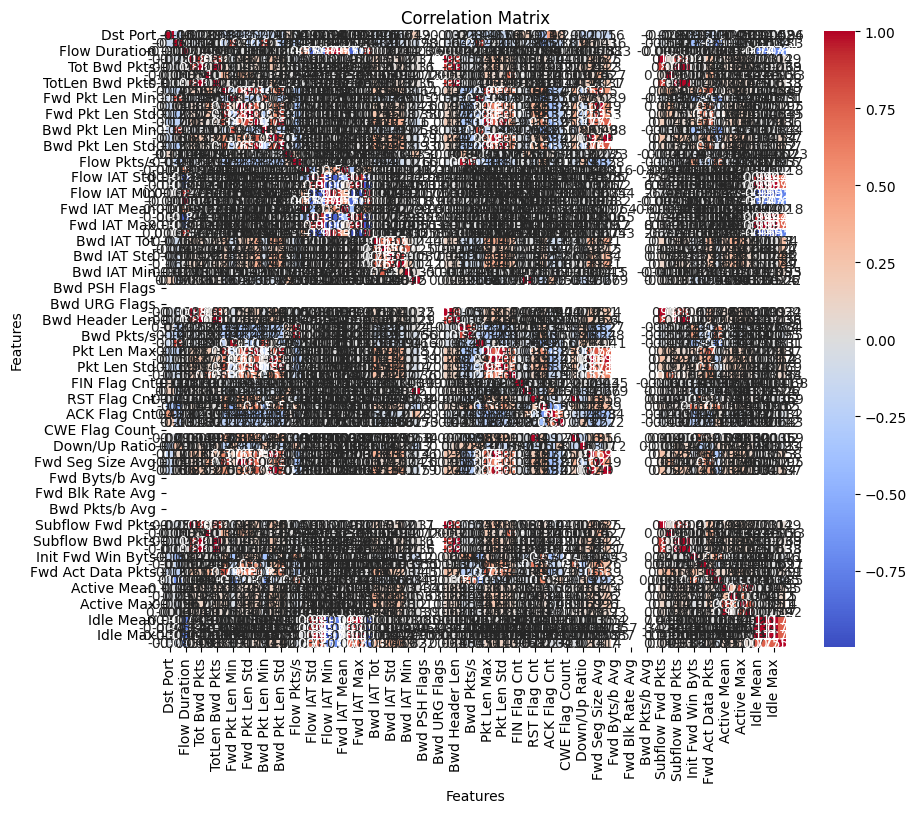

In [8]:
# Select only the numerical columns
numeric_columns = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

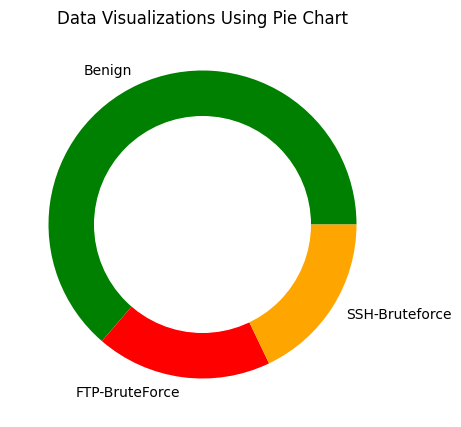

In [9]:
# Create a pie chart
labels = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce']
colors = ['green', 'red', 'orange']
label_counts = df['Label'].value_counts()

plt.figure(figsize=(5, 5))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Data Visualizations Using Pie Chart')
plt.pie(label_counts, labels=labels, colors=colors)
plt.gca().add_artist(circle)

# Display the pie chart
plt.show()

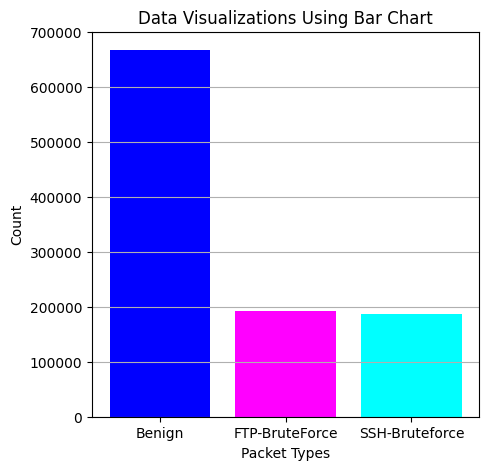

In [10]:
# Bar chart
plt.figure(figsize=(5, 5))
plt.title('Data Visualizations Using Bar Chart')
labels = ['Benign', 'FTP-BruteForce', 'SSH-Bruteforce']
counts = df['Label'].value_counts()
colors = ['blue', 'magenta', 'cyan']
plt.bar(x=labels, height=counts, color=colors)
plt.xlabel('Packet Types')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()

## Data Preprocessing

In [11]:
%%time
# Print the original shape of the DataFrame
print(df.shape)

# Replace all infinity values with NaN
df = df.replace(["Infinity", "infinity"], np.inf)
df = df.replace([np.inf, -np.inf], np.nan)

# Drop all NaN values
df.dropna(inplace=True)

# Print the new shape of the DataFrame
print(df.shape)

(1048575, 80)
(1044751, 80)
Wall time: 1.33 s


In [12]:
# Drop the "Timestamp" column from the dataframe
df.drop(columns="Timestamp", inplace=True)

# Print the updated shape of the dataframe
print("Shape after dropping 'Timestamp' column:", df.shape)

Shape after dropping 'Timestamp' column: (1044751, 79)


In [13]:
# Encode the target feature as "Benign" or "Malicious"
df['Label'] = df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Suspicious")

# Display the unique values in the 'Label' column
unique_labels = df['Label'].unique()
print(unique_labels)

# Explanation:
# It maps the values of the 'Label' column, changing 'Benign' to 'Benign' and any other value to 'Suspicious'.
# The resulting unique values in the 'Label' column are then displayed.

['Benign' 'Suspicious']


In [14]:
# Get the count of each unique value in the 'Label' column
df['Label'].value_counts()

Label
Benign        663808
Suspicious    380943
Name: count, dtype: int64

## Handle Oversampling

In [15]:
# Split data into features and target
X = df.drop(["Label"], axis=1)
y = df["Label"]

In [16]:
# Apply oversampling using RandomOverSampler
ros = RandomOverSampler()
X_balanced, y_balanced = ros.fit_resample(X, y)

In [17]:
# Concatenate X_balanced and y_balanced to create the network data dataframe
df = pd.concat([X_balanced, y_balanced], axis=1)

# Print the shape of the network data dataframe
print(df.shape)

# Print the value counts of the 'Label' column in the network data dataframe
print(df['Label'].value_counts())

(1327616, 79)
Label
Benign        663808
Suspicious    663808
Name: count, dtype: int64


## Data Scaling

In [18]:
# Select numeric columns in the df dataframe
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Print the list of numeric column names
print(numeric_cols)

['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'B

In [19]:
# Create an instance of RobustScaler
robust = RobustScaler()

# Apply robust normalization to the numeric columns in the df dataframe
df[numeric_cols] = robust.fit_transform(df[numeric_cols])

In [20]:
df

Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts   
0       -0.372881      -6.0     298.579812      0.333333          -0.2  \
1       -0.372881      -6.0     298.579141      0.333333          -0.2   
2       -0.372881      -6.0     298.571605      0.333333          -0.2   
3        0.000000       0.0      17.106564      2.333333           1.8   
4        0.000000       0.0      23.336004      2.166667           2.0   
...           ...       ...            ...           ...           ...   
1327611 -0.016949       0.0      -0.001044      0.000000           0.0   
1327612 -0.016949       0.0      -0.001044      0.000000           0.0   
1327613 -0.016949       0.0      -0.001042      0.000000           0.0   
1327614  0.000000       0.0       1.005813      3.500000           3.8   
1327615  0.000000       0.0      -0.001031      0.000000           0.0   

         TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min   
0               0.000000         0.000000         0.000000              0.0  \
1               0.000000         0.000000         0.000000              0.0   
2               0.000000         0.000000         0.000000              0.0   
3               2.723077         2.959635         3.738693              0.0   
4               2.512088         2.876302         3.738693              0.0   
...                  ...              ...              ...              ...   
1327611         0.000000         0.000000         0.000000              0.0   
1327612         0.000000         0.000000         0.000000              0.0   
1327613         0.000000         0.000000         0.000000              0.0   
1327614         4.237363         3.470052         3.216080              0.0   
1327615         0.000000         0.000000         0.000000              0.0   

         Fwd Pkt Len Mean  ...  Fwd Seg Size Min  Active Mean  Active Std   
0                0.000000  ...              -1.6          0.0         0.0  \
1                0.000000  ...              -1.6          0.0         0.0   
2                0.000000  ...              -1.6          0.0         0.0   
3                1.496716  ...               0.0          0.0         0.0   
4                1.479372  ...               0.0          0.0         0.0   
...                   ...  ...               ...          ...         ...   
1327611          0.000000  ...               0.4          0.0         0.0   
1327612          0.000000  ...               0.4          0.0         0.0   
1327613          0.000000  ...               0.4          0.0         0.0   
1327614          1.587975  ...               0.0          0.0         0.0   
1327615          0.000000  ...               0.0          0.0         0.0   

         Active Max  Active Min   Idle Mean    Idle Std    Idle Max   
0               0.0         0.0  56320859.5  139.300036  56320958.0  \
1               0.0         0.0  56320733.0  114.551299  56320814.0   
2               0.0         0.0  56319311.5  301.934596  56319525.0   
3               0.0         0.0         0.0    0.000000         0.0   
4               0.0         0.0         0.0    0.000000         0.0   
...             ...         ...         ...         ...         ...   
1327611         0.0         0.0         0.0    0.000000         0.0   
1327612         0.0         0.0         0.0    0.000000         0.0   
1327613         0.0         0.0         0.0    0.000000         0.0   
1327614         0.0         0.0         0.0    0.000000         0.0   
1327615         0.0         0.0         0.0    0.000000         0.0   

           Idle Min       Label  
0        56320761.0      Benign  
1        56320652.0      Benign  
2        56319098.0      Benign  
3               0.0      Benign  
4               0.0      Benign  
...             ...         ...  
1327611         0.0  Suspicious  
1327612         0.0  Suspicious  
1327613         0.0  Suspicious  
1327614         0.0  Suspicious  
1327615         0.0

## Feature Selection

In [21]:
# Calculate variances of numeric columns in the dataframe
variances = df.var(numeric_only=True)

# Identify constant columns (columns with variance equal to 0)
constant_columns = variances[variances == 0].index

# Drop the constant columns from the dataframe
df = df.drop(constant_columns, axis=1)

# Print the shape of the modified dataframe
print(df.shape)

(1327616, 69)


In [22]:
# Identify duplicate columns
duplicates = set()

# Iterate over columns to find duplicates
for i in range(0, len(df.columns)):
    col1 = df.columns[i]
    for j in range(i+1, len(df.columns)):
        col2 = df.columns[j]
        if df[col1].equals(df[col2]):
            duplicates.add(col2)

# Print the duplicate columns
print("Duplicate columns:", duplicates)

# Drop duplicate columns from the dataframe
df.drop(duplicates, axis=1, inplace=True)

# Print the shape of the updated dataframe
print("Shape of df after dropping duplicates:", df.shape)


Duplicate columns: {'Subflow Fwd Byts', 'Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'SYN Flag Cnt', 'Subflow Bwd Byts'}
Shape of df after dropping duplicates: (1327616, 63)


In [23]:
# Convert 'Label' column to binary values
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

# Print the unique values in the 'Label' column
print(df['Label'].unique())


[0 1]


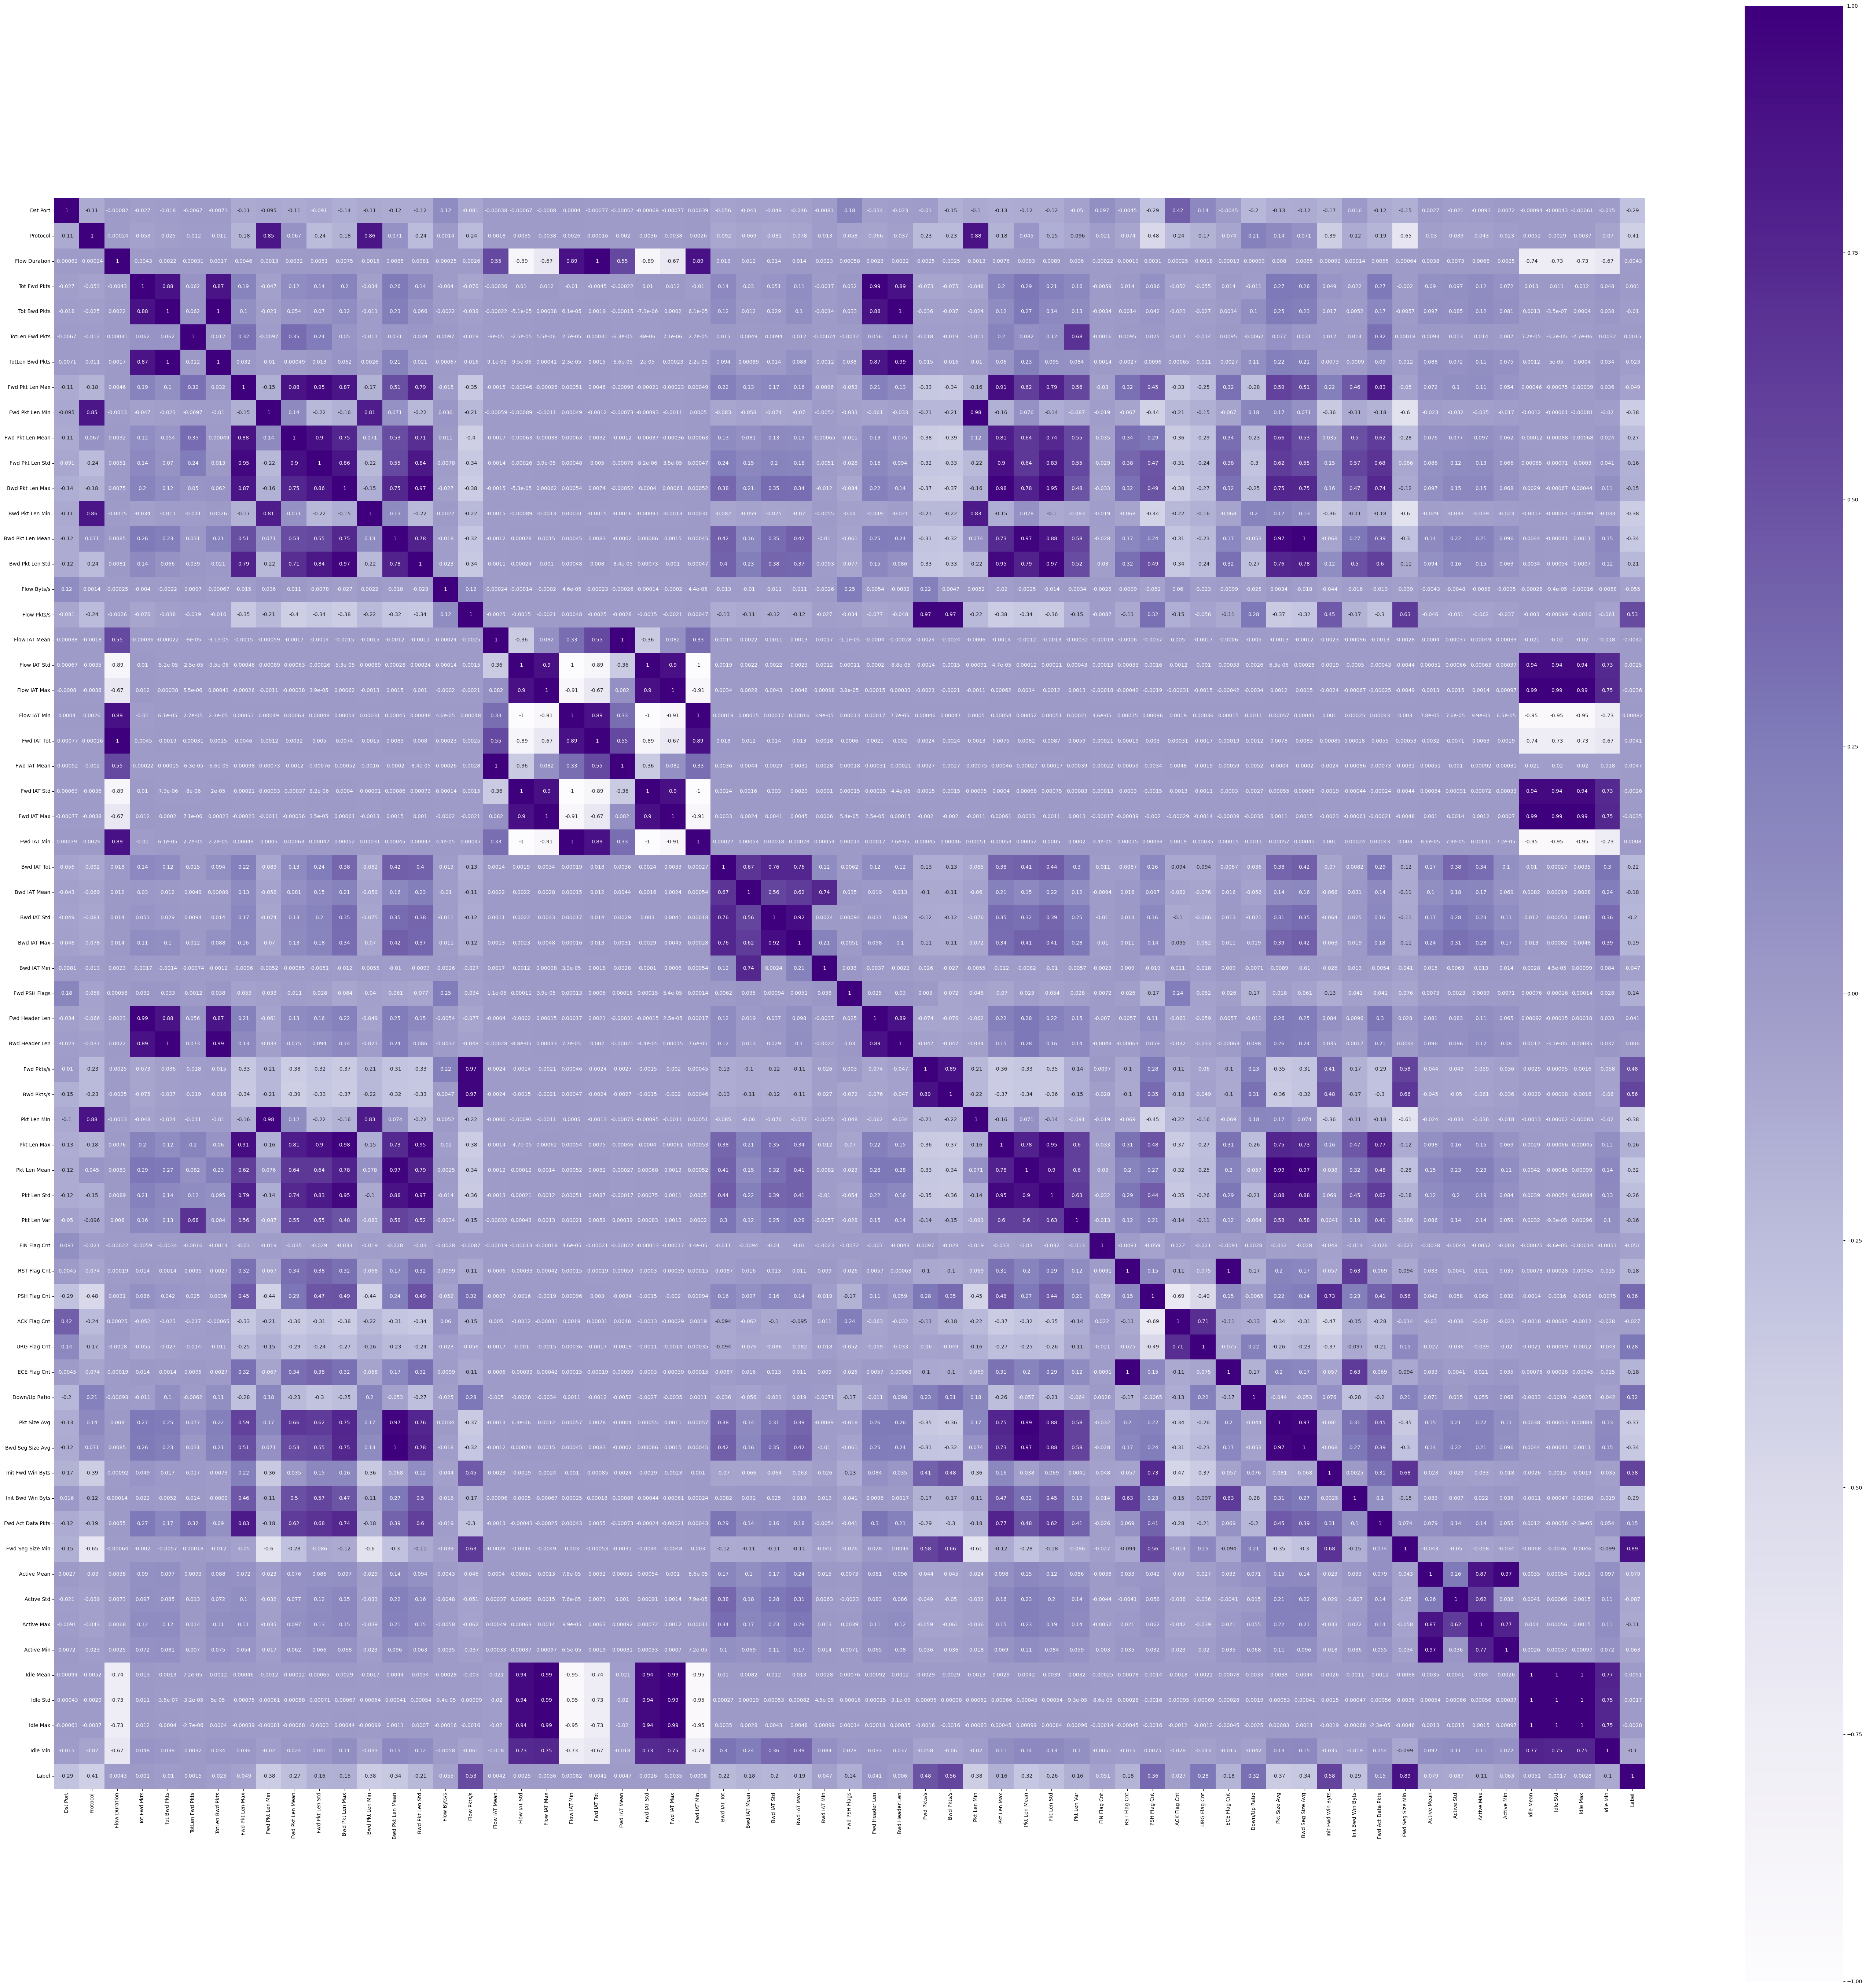

In [24]:
# Set the figure size
plt.figure(figsize=(70, 70))

# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='Purples', vmin=-1, vmax=1, square=True)

# Display the plot
plt.show()

In [25]:
# Set of correlated columns
correlated_col = set()

# Boolean list to track correlated columns
is_correlated = [True] * len(corr.columns)

# Correlation threshold
threshold = 0.85

# Iterate over correlation matrix
for i in range(len(corr.columns)):
    if is_correlated[i]:
        for j in range(i):
            if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
                colname = corr.columns[j]
                is_correlated[j] = False
                correlated_col.add(colname)

# Print correlated columns
print(correlated_col)

# Print number of correlated columns
print(len(correlated_col))


{'Flow IAT Max', 'Pkt Len Max', 'Fwd Pkt Len Std', 'Bwd Pkt Len Mean', 'Idle Std', 'Pkt Len Mean', 'Fwd Pkt Len Max', 'Fwd IAT Max', 'Flow IAT Mean', 'Flow Duration', 'Active Mean', 'Tot Bwd Pkts', 'Flow IAT Min', 'Fwd IAT Std', 'Fwd Pkt Len Min', 'Fwd Header Len', 'Idle Mean', 'Pkt Len Std', 'Fwd Pkts/s', 'Flow Pkts/s', 'Bwd Pkt Len Std', 'Protocol', 'Fwd Seg Size Min', 'Fwd IAT Tot', 'TotLen Bwd Pkts', 'RST Flag Cnt', 'Pkt Size Avg', 'Tot Fwd Pkts', 'Bwd IAT Std', 'Bwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Flow IAT Std'}
32


In [26]:
# Drop correlated columns from the dataframe
df.drop(correlated_col, axis=1, inplace=True)

# Print the shape of the dataframe after dropping columns
print(df.shape)


(1327616, 31)


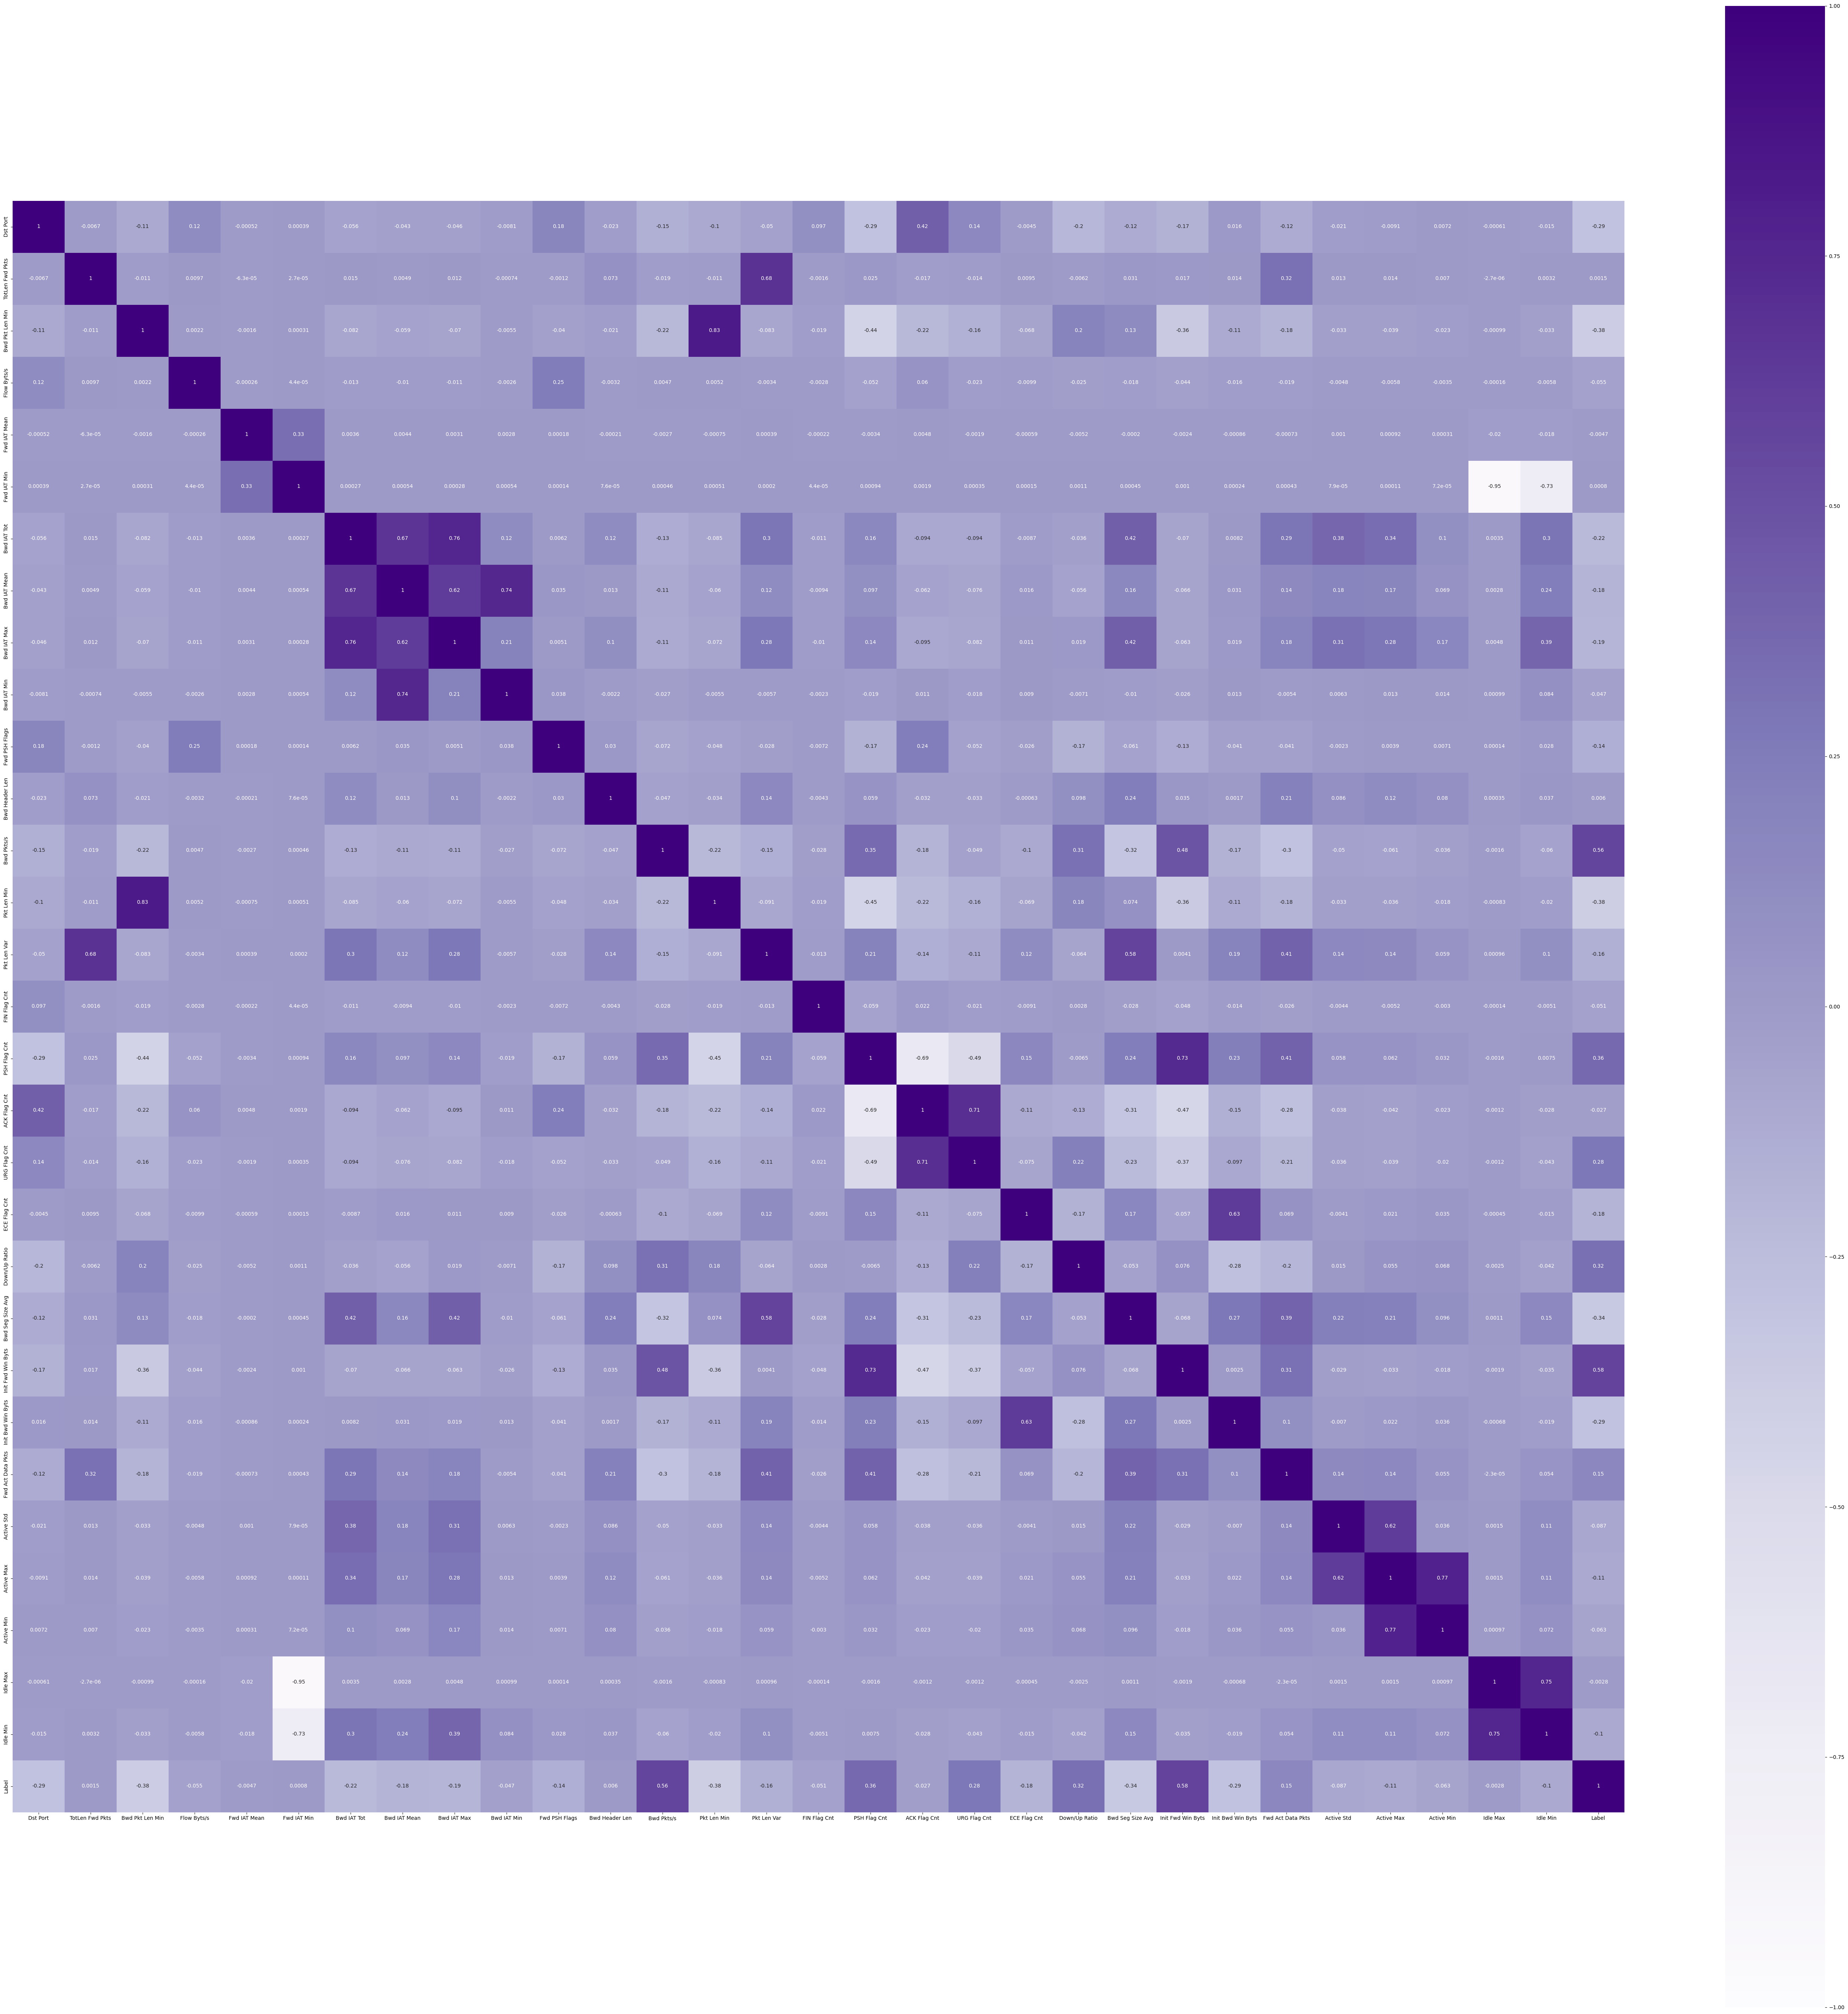

In [27]:
# Set the figure size
plt.figure(figsize=(70, 70))

# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='Purples', vmin=-1, vmax=1, square=True)

# Display the plot
plt.show()

In [28]:
df

Dst Port  TotLen Fwd Pkts  Bwd Pkt Len Min  Flow Byts/s   
0       -0.372881         0.000000              0.0     0.000000  \
1       -0.372881         0.000000              0.0     0.000000   
2       -0.372881         0.000000              0.0     0.000000   
3        0.000000         2.723077              0.0     0.045570   
4        0.000000         2.512088              0.0     0.031884   
...           ...              ...              ...          ...   
1327611 -0.016949         0.000000              0.0     0.000000   
1327612 -0.016949         0.000000              0.0     0.000000   
1327613 -0.016949         0.000000              0.0     0.000000   
1327614  0.000000         4.237363              0.0     1.012615   
1327615  0.000000         0.000000              0.0     0.000000   

         Fwd IAT Mean    Fwd IAT Min  Bwd IAT Tot  Bwd IAT Mean  Bwd IAT Max   
0         2974.571712  354218.622642     0.000000      0.000000     0.000000  \
1         2974.565031  354217.937107     0.000000      0.000000     0.000000   
2         2974.489955  354208.163522     0.000000      0.000000     0.000000   
3           24.347468    1444.905660    16.415639     35.765061    10.114446   
4           35.768037    1552.981132    22.464837     44.050106    18.845172   
...               ...            ...          ...           ...          ...   
1327611      0.000000       0.000000     0.000000      0.000000     0.000000   
1327612      0.000000       0.000000     0.000000      0.000000     0.000000   
1327613      0.000000       0.000000     0.000000      0.000000     0.000000   
1327614      0.955197       1.748428     1.105958      1.141376     1.035565   
1327615      0.000000       0.000000     0.000000      0.000000     0.000000   

         Bwd IAT Min  ...  Bwd Seg Size Avg  Init Fwd Win Byts   
0               0.00  ...          0.000000          -0.307522  \
1               0.00  ...          0.000000          -0.307522   
2               0.00  ...          0.000000          -0.307522   
3              69.25  ...          1.876398           2.152353   
4              11.25  ...          1.657786          -0.089483   
...              ...  ...               ...                ...   
1327611         0.00  ...          0.000000           0.701561   
1327612         0.00  ...          0.000000           0.701561   
1327613         0.00  ...          0.000000           0.701561   
1327614         1.00  ...          1.100000           0.701561   
1327615         0.00  ...          0.000000          -0.298439   

         Init Bwd Win Byts  Fwd Act Data Pkts  Active Std  Active Max   
0                -0.004329                0.0         0.0         0.0  \
1                -0.004329                0.0         0.0         0.0   
2                -0.004329                0.0         0.0         0.0   
3                 1.008658                1.5         0.0         0.0   
4                 1.008658                1.5         0.0         0.0   
...                    ...                ...         ...         ...   
1327611           0.000000                0.0         0.0         0.0   
1327612           0.000000                0.0         0.0         0.0   
1327613           0.000000                0.0         0.0         0.0   
1327614           0.995671                4.0         0.0         0.0   
1327615           0.995671                0.0         0.0         0.0   

         Active Min    Idle Max    Idle Min  Label  
0               0.0  56320958.0  56320761.0      0  
1               0.0  56320814.0  56320652.0      0  
2               0.0  56319525.0  56319098.0      0  
3               0.0         0.0         0.0      0  
4               0.0         0.0         0.0      0  
...             ...         ...         ...    ...  
1327611         0.0         0.0         0.0      1  
1327612         0.0         0.0         0.0      1  
1327613         0.0         0.0         0.0      1  
1327614         0.0         0.0

In [29]:
# Save the modified dataframe to a CSV file
df.to_csv("modified_data.csv", index=False)

## Data Splitting, Model Training and Evaluate the Model

In [30]:
# # Split data into features and target
# X = df.drop(["Label"], axis=1)
# y = df["Label"]

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Further split the train set into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [31]:
# from sklearn.model_selection import learning_curve
# # Create a learning curve object.
# lc = learning_curve(RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train, cv=5)

# # Fit the learning curve object to the training data.
# lc.fit()

# # Plot the learning curve.
# plt.plot(lc.train_sizes, lc.train_scores_mean, label="Training score")
# plt.plot(lc.train_sizes, lc.test_scores_mean, label="Test score")
# plt.legend()
# plt.show()

In [32]:
# # Initialize a Random Forest classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [33]:
# # Train the Random Forest model
# rf.fit(X_train, y_train)

In [34]:
# def evaluate_model(model, X, y):
#     y_pred = model.predict(X)
#     precision = precision_score(y, y_pred)
#     recall = recall_score(y, y_pred)
#     f1 = f1_score(y, y_pred)
#     accuracy = accuracy_score(y, y_pred)
#     return precision, recall, f1, accuracy

# # Create a list of dataset splits and their corresponding names
# datasets = [
#     ("Train", X_train, y_train),
#     ("Validation", X_val, y_val),
#     ("Test", X_test, y_test)
# ]

# # List to store the evaluation results
# evaluation_results = []

# # Loop through the datasets and evaluate the model
# for dataset_name, X_dataset, y_dataset in datasets:
#     precision, recall, f1, accuracy = evaluate_model(rf, X_dataset, y_dataset)
#     result = [dataset_name, precision, recall, f1, accuracy]
#     evaluation_results.append(result)

In [35]:
# # Define the table headers
# headers = ["Dataset", "Precision", "Recall", "F1-score", "Accuracy"]

# # Print the evaluation results as a table
# print("Evaluation Results:")
# print(tabulate(evaluation_results, headers=headers, tablefmt="grid"))
# print()

In [36]:
# # Convert the evaluation results to a numpy array
# evaluation_array = np.array([result[1:] for result in evaluation_results])

# # Create a heatmap
# sns.heatmap(evaluation_array, annot=True, cmap="GnBu", xticklabels=headers[1:], yticklabels=[result[0] for result in evaluation_results])
# plt.title("Evaluation Metrics Heatmap\n")
# plt.xlabel("Metrics")
# plt.ylabel("Dataset")
# plt.show()

In [37]:
# # Example input data
# inputData =()

# # Changing the inputData to numpy array
# inputDataAsNumpyArray = np.asarray(inputData)

# # Make predictions
# predictions = rf.predict([inputDataAsNumpyArray])

# # Print the prediction
# prediction = predictions[0]
# print("Prediction:", prediction)

# if prediction == 0:
#     print("The object is Benign")
# else:
#     print("The object is Suspicious")

In [39]:
# import time
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import log_loss
# from sklearn.model_selection import learning_curve

# # Split data into features and target
# X = df.drop(["Label"], axis=1)
# y = df["Label"]

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Further split the train set into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Initialize a Random Forest classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Start the timer
# start_time = time.time()

# # Train the Random Forest model
# rf.fit(X_train, y_train)

# # Calculate the training time
# training_time = time.time() - start_time

# def evaluate_model(model, X, y):
#     y_pred = model.predict(X)
#     precision = precision_score(y, y_pred)
#     recall = recall_score(y, y_pred)
#     f1 = f1_score(y, y_pred)
#     accuracy = accuracy_score(y, y_pred)
#     loss = log_loss(y, model.predict_proba(X))
#     return precision, recall, f1, accuracy, loss

# # Create a list of dataset splits and their corresponding names
# datasets = [
#     ("Train", X_train, y_train),
#     ("Validation", X_val, y_val),
#     ("Test", X_test, y_test)
# ]

# # List to store the evaluation results
# evaluation_results = []

# # Loop through the datasets and evaluate the model
# for dataset_name, X_dataset, y_dataset in datasets:
#     precision, recall, f1, accuracy, loss = evaluate_model(rf, X_dataset, y_dataset)
#     result = [dataset_name, precision, recall, f1, accuracy, loss]
#     evaluation_results.append(result)

# # Define the table headers
# headers = ["Dataset", "Precision", "Recall", "F1-score", "Accuracy", "Loss"]

# # Print the evaluation results as a table
# print("Evaluation Results:")
# print(tabulate(evaluation_results, headers=headers, tablefmt="grid"))
# print()

# # Plot the learning curve
# plt.figure(figsize=(12, 6))
# train_sizes, train_scores, val_scores = learning_curve(rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
# train_scores_mean = np.mean(train_scores, axis=1)
# val_scores_mean = np.mean(val_scores, axis=1)
# plt.plot(train_sizes, train_scores_mean, label='Train')
# plt.plot(train_sizes, val_scores_mean, label='Validation')
# plt.xlabel('Training Set Size')
# plt.ylabel('Accuracy')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()

# # Calculate and print the confusion matrix for the test set
# y_pred_test = rf.predict(X_test)
# cm = confusion_matrix(y_test, y_pred_test)
# print("Confusion Matrix (Test Set):")
# print(cm)
# print()

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# plot_confusion_matrix(rf, X_test, y_test, cmap='Blues')
# plt.title('Confusion Matrix (Test Set)')
# plt.show()

# # Print the training time
# print("Model Training Time:", training_time, "seconds")


Evaluation Results:
+------------+-------------+----------+------------+------------+-------------+
| Dataset    |   Precision |   Recall |   F1-score |   Accuracy |        Loss |
+============+=============+==========+============+============+=============+
| Train      |    1        |        1 |   1        |   1        | 3.35971e-06 |
+------------+-------------+----------+------------+------------+-------------+
| Validation |    1        |        1 |   1        |   1        | 6.10972e-06 |
+------------+-------------+----------+------------+------------+-------------+
| Test       |    0.999985 |        1 |   0.999992 |   0.999992 | 2.46203e-05 |
+------------+-------------+----------+------------+------------+-------------+



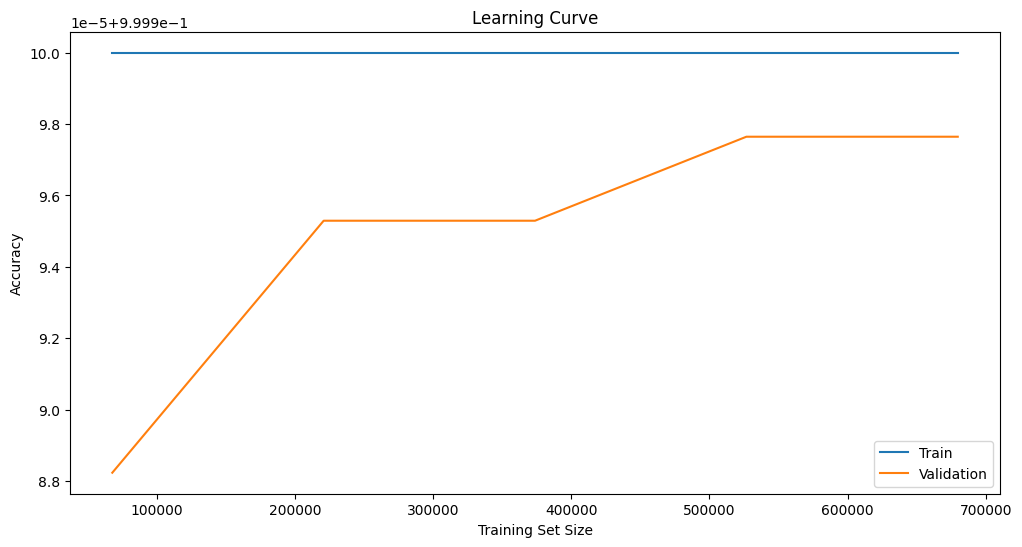

Confusion Matrix (Test Set):
[[132971      2]
 [     0 132551]]



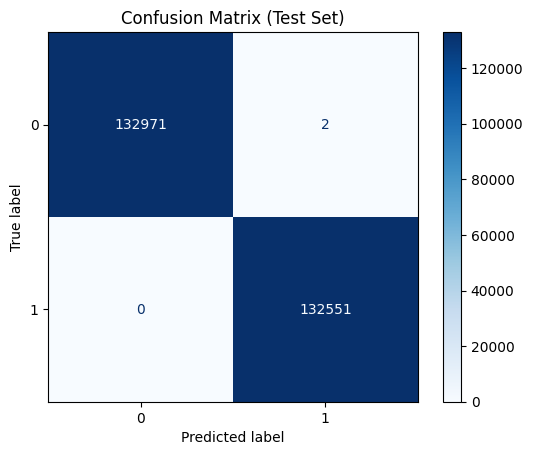

Model Training Time: 62.22260880470276 seconds


In [41]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay

# Split data into features and target
X = df.drop(["Label"], axis=1)
y = df["Label"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Start the timer
start_time = time.time()

# Train the Random Forest model
rf.fit(X_train, y_train)

# Calculate the training time
training_time = time.time() - start_time

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    loss = log_loss(y, model.predict_proba(X))
    return precision, recall, f1, accuracy, loss

# Create a list of dataset splits and their corresponding names
datasets = [
    ("Train", X_train, y_train),
    ("Validation", X_val, y_val),
    ("Test", X_test, y_test)
]

# List to store the evaluation results
evaluation_results = []

# Loop through the datasets and evaluate the model
for dataset_name, X_dataset, y_dataset in datasets:
    precision, recall, f1, accuracy, loss = evaluate_model(rf, X_dataset, y_dataset)
    result = [dataset_name, precision, recall, f1, accuracy, loss]
    evaluation_results.append(result)

# Define the table headers
headers = ["Dataset", "Precision", "Recall", "F1-score", "Accuracy", "Loss"]

# Print the evaluation results as a table
print("Evaluation Results:")
print(tabulate(evaluation_results, headers=headers, tablefmt="grid"))
print()

# Plot the learning curve
plt.figure(figsize=(12, 6))
train_sizes, train_scores, val_scores = learning_curve(rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, val_scores_mean, label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Calculate and print the confusion matrix for the test set
y_pred_test = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Test Set):")
print(cm)
print()

# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Print the training time
print("Model Training Time:", training_time, "seconds")
